In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os




# Data Augmentation

In [2]:
# Data_Directory = './Data/15_Nov_Readings'
Data_Directory = './Data/25-02-04'
# file = './Data_1/ble_datalog_2024-09-12_16-05-30.csv'

In [3]:
import re

def convert_log_to_dict(log_string):
    # Regular expression to extract the necessary information
    pattern = r"\d+\. (ble_datalog__Rx_\d__\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}) \(grid (\d+),(\d+)\)"
    matches = re.findall(pattern, log_string)

    # Constructing the dictionary in the desired format
    result = {}
    for match in matches:
        filename = f"{match[0]}.csv"
        grid_coordinates = (int(match[1]), int(match[2]))
        result[filename] = grid_coordinates

    return result

# Input log string
log_string = """

1. ble_datalog__Rx_0__2025-02-04_04-07-46 (grid 0,0)
2. ble_datalog__Rx_2__2025-02-04_04-07-46 (grid 0,1)
3. ble_datalog__Rx_0__2025-02-04_05-10-05 (grid 0,2)
4. ble_datalog__Rx_1__2025-02-04_05-43-22 (grid 0,3)
5. ble_datalog__Rx_2__2025-02-04_05-43-22 (grid 0,4)
6. ble_datalog__Rx_1__2025-02-04_06-12-38 (grid 0,5)
7. ble_datalog__Rx_2__2025-02-04_06-41-41 (grid 0,6)
8. ble_datalog__Rx_1__2025-02-04_06-41-41 (grid 0,7)
9. ble_datalog__Rx_1__2025-02-04_04-07-46 (grid 1,0)
10. ble_datalog__Rx_1__2025-02-04_05-10-05 (grid 1,1)
11. ble_datalog__Rx_2__2025-02-04_05-10-05 (grid 1,2)
12. ble_datalog__Rx_0__2025-02-04_05-43-22 (grid 1,3)
13. ble_datalog__Rx_0__2025-02-04_06-12-38 (grid 1,4)
14. ble_datalog__Rx_2__2025-02-04_06-12-38 (grid 1,5)
15. ble_datalog__Rx_0__2025-02-04_07-13-56 (grid 1,6)
16. ble_datalog__Rx_0__2025-02-04_06-41-41 (grid 1,7)
17. ble_datalog__Rx_1__2025-02-04_07-13-56 (grid 2,6)
18. ble_datalog__Rx_2__2025-02-04_07-13-56 (grid 2,7)
19. ble_datalog__Rx_1__2025-02-04_08-49-07 (grid 4,4)
20. ble_datalog__Rx_1__2025-02-04_08-29-14 (grid 4,5)
21. ble_datalog__Rx_0__2025-02-04_08-29-14 (grid 4,6)
22. ble_datalog__Rx_2__2025-02-04_08-01-36 (grid 4,7)
23. ble_datalog__Rx_0__2025-02-04_09-11-34 (grid 5,2)
24. ble_datalog__Rx_2__2025-02-04_08-49-07 (grid 5,3)
25. ble_datalog__Rx_0__2025-02-04_08-49-07 (grid 5,4)
26. ble_datalog__Rx_2__2025-02-04_08-29-14 (grid 5,5)
27. ble_datalog__Rx_0__2025-02-04_08-01-36 (grid 5,6)
28. ble_datalog__Rx_1__2025-02-04_08-01-36 (grid 5,7)

29. ble_datalog__Rx_0__2025-02-04_11-18-33 (grid 7,7)
30. ble_datalog__Rx_0__2025-02-04_12-09-11 (grid 6,5)
31. ble_datalog__Rx_0__2025-02-04_13-04-37 (grid 7,4)
32. ble_datalog__Rx_0__2025-02-04_13-31-48 (grid 6,2)
33. ble_datalog__Rx_0__2025-02-04_14-15-53 (grid 7,1)
34. ble_datalog__Rx_0__2025-02-04_14-46-12 (grid 5,0)
35. ble_datalog__Rx_1__2025-02-04_11-18-33 (grid 7,6)
36. ble_datalog__Rx_1__2025-02-04_12-09-11 (grid 7,5)
37. ble_datalog__Rx_1__2025-02-04_13-04-37 (grid 7,3)
38. ble_datalog__Rx_1__2025-02-04_13-31-48 (grid 7,2)
39. ble_datalog__Rx_1__2025-02-04_14-15-53 (grid 7,0)
40. ble_datalog__Rx_1__2025-02-04_14-46-12 (grid 6,0)
41. ble_datalog__Rx_2__2025-02-04_11-18-33 (grid 6,7)
42. ble_datalog__Rx_2__2025-02-04_12-09-11 (grid 6,6)
43. ble_datalog__Rx_2__2025-02-04_13-04-37 (grid 6,4)
44. ble_datalog__Rx_2__2025-02-04_13-31-48 (grid 6,3)
45. ble_datalog__Rx_2__2025-02-04_14-15-53 (grid 6,1)
46. ble_datalog__Rx_2__2025-02-04_14-46-12 (grid 5,1)

47. ble_datalog__Rx_0__2025-02-04_12-06-49 (grid 3,0)
48. ble_datalog__Rx_0__2025-02-04_13-08-25 (grid 3,2)
49. ble_datalog__Rx_0__2025-02-04_13-33-54 (grid 3,4)
50. ble_datalog__Rx_0__2025-02-04_14-00-17 (grid 3,6)
51. ble_datalog__Rx_0__2025-02-04_14-27-54 (grid 2,4)
52. ble_datalog__Rx_0__2025-02-04_14-54-17 (grid 2,2)
53. ble_datalog__Rx_0__2025-02-04_15-20-11 (grid 2,0)
54. ble_datalog__Rx_0__2025-02-04_15-43-46 (grid 4,0)
55. ble_datalog__Rx_0__2025-02-04_16-09-02 (grid 4,2)
56. ble_datalog__Rx_1__2025-02-04_12-06-49 (grid 3,1)
57. ble_datalog__Rx_1__2025-02-04_13-08-25 (grid 3,3)
58. ble_datalog__Rx_1__2025-02-04_13-33-54 (grid 3,5)
59. ble_datalog__Rx_1__2025-02-04_14-00-17 (grid 3,7)
60. ble_datalog__Rx_1__2025-02-04_14-27-54 (grid 2,5)
61. ble_datalog__Rx_1__2025-02-04_14-54-17 (grid 2,3)
62. ble_datalog__Rx_1__2025-02-04_15-20-11 (grid 2,1)
63. ble_datalog__Rx_1__2025-02-04_15-43-46 (grid 4,1)
64. ble_datalog__Rx_1__2025-02-04_16-09-02 (grid 4,3)



"""

coord_mapping  = convert_log_to_dict(log_string)

print(f"{{\n    {coord_mapping}\n}}")



{
    {'ble_datalog__Rx_0__2025-02-04_04-07-46.csv': (0, 0), 'ble_datalog__Rx_2__2025-02-04_04-07-46.csv': (0, 1), 'ble_datalog__Rx_0__2025-02-04_05-10-05.csv': (0, 2), 'ble_datalog__Rx_1__2025-02-04_05-43-22.csv': (0, 3), 'ble_datalog__Rx_2__2025-02-04_05-43-22.csv': (0, 4), 'ble_datalog__Rx_1__2025-02-04_06-12-38.csv': (0, 5), 'ble_datalog__Rx_2__2025-02-04_06-41-41.csv': (0, 6), 'ble_datalog__Rx_1__2025-02-04_06-41-41.csv': (0, 7), 'ble_datalog__Rx_1__2025-02-04_04-07-46.csv': (1, 0), 'ble_datalog__Rx_1__2025-02-04_05-10-05.csv': (1, 1), 'ble_datalog__Rx_2__2025-02-04_05-10-05.csv': (1, 2), 'ble_datalog__Rx_0__2025-02-04_05-43-22.csv': (1, 3), 'ble_datalog__Rx_0__2025-02-04_06-12-38.csv': (1, 4), 'ble_datalog__Rx_2__2025-02-04_06-12-38.csv': (1, 5), 'ble_datalog__Rx_0__2025-02-04_07-13-56.csv': (1, 6), 'ble_datalog__Rx_0__2025-02-04_06-41-41.csv': (1, 7), 'ble_datalog__Rx_1__2025-02-04_07-13-56.csv': (2, 6), 'ble_datalog__Rx_2__2025-02-04_07-13-56.csv': (2, 7), 'ble_datalog__Rx_1__2

In [4]:
def normalize_time_columns(df, time_columns):
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], format='%H-%M-%S')
        min_time = df[col].min()
        df[col] = (df[col] - min_time).dt.total_seconds()
    return df

# Function to process each CSV file
def process_csv(file_path, x_coord, y_coord):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Add X_Coord and Y_Coord from mapping
    data['X_Coord'] = x_coord
    data['Y_Coord'] = y_coord

    # Identify and normalize time columns
    time_columns = [col for col in data.columns if 'Time' in col]
    data = normalize_time_columns(data, time_columns)

    return data

# Main function to process all CSV files in a directory
def combine_all_csvs(directory, coord_mapping):
    combined_data = []  # List to store individual DataFrames
    
    for filename in coord_mapping.keys():
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)

            # Get X_Coord and Y_Coord from the mapping
            if filename in coord_mapping:
                x_coord, y_coord = coord_mapping[filename]
            else:
                # Default coordinates if not in the mapping
                x_coord, y_coord = (0, 0)

            # Process CSV and add to the list
            data = process_csv(file_path, x_coord, y_coord)
            combined_data.append(data)

    # Concatenate all DataFrames into one large DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df



In [5]:
combined_df = combine_all_csvs(Data_Directory, coord_mapping)

# Now print the DataFrame
combined_df

,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI,X_Coord,Y_Coord
0,-54,-77,-74,127,127,-78,127,-71,0,0
1,-54,-77,127,-81,127,127,-81,-71,0,0
2,-54,127,127,127,127,127,127,-71,0,0
3,-54,-77,-74,-82,127,127,-82,-70,0,0
4,-54,-77,127,127,127,-78,-80,-70,0,0
...,...,...,...,...,...,...,...,...,...,...
7389,-70,-69,-80,-65,-79,127,-73,-62,4,3
7390,-70,-70,-84,-65,-79,-84,-74,-61,4,3
7391,-70,-69,-80,-64,-80,127,-76,-61,4,3
7392,-70,-70,-82,-67,-83,-84,-79,-61,4,3


In [6]:
cleaned_df = combined_df

rssi_columns = [col for col in cleaned_df.columns if 'RSSI' in col]
batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]

print(rssi_columns)
print(batt_columns)

# Replace RSSI values greater than 0 with NaN
# cleaned_df[rssi_columns] = cleaned_df[rssi_columns].where(cleaned_df[rssi_columns] <= 0, np.nan)

# Replace Battery values less than 0 with NaN
cleaned_df[batt_columns] = cleaned_df[batt_columns].where(cleaned_df[batt_columns] >= 0, np.nan)
# cleaned_df = cleaned_df.dropna()

cleaned_df


['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']
[]


,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI,X_Coord,Y_Coord
0,-54,-77,-74,127,127,-78,127,-71,0,0
1,-54,-77,127,-81,127,127,-81,-71,0,0
2,-54,127,127,127,127,127,127,-71,0,0
3,-54,-77,-74,-82,127,127,-82,-70,0,0
4,-54,-77,127,127,127,-78,-80,-70,0,0
...,...,...,...,...,...,...,...,...,...,...
7389,-70,-69,-80,-65,-79,127,-73,-62,4,3
7390,-70,-70,-84,-65,-79,-84,-74,-61,4,3
7391,-70,-69,-80,-64,-80,127,-76,-61,4,3
7392,-70,-70,-82,-67,-83,-84,-79,-61,4,3


In [7]:

file_path = os.path.join(Data_Directory, 'combined_data.csv')
cleaned_df.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")

Data saved successfully to ./Data/25-02-04\combined_data.csv


#### Data visualisation of raw data

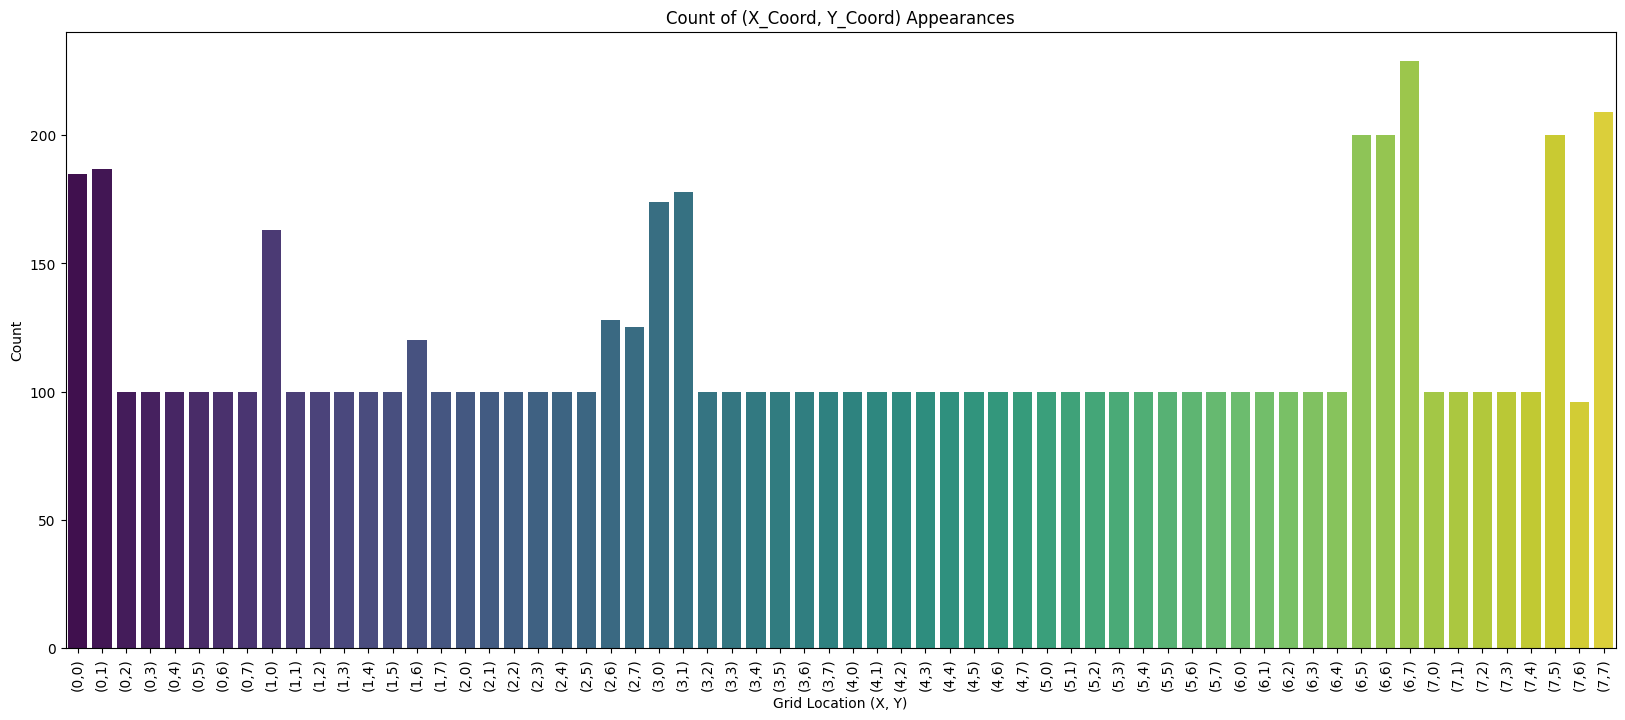

In [8]:
import seaborn as sns
# Count appearances of (X_Coord, Y_Coord) pairs
x_coords = np.arange(8)  # 0 to 7
y_coords = np.arange(8)  # 0 to 7
all_locations = pd.DataFrame([(x, y) for x in x_coords for y in y_coords], columns=['X_Coord', 'Y_Coord'])

# Count occurrences of (X_Coord, Y_Coord) in combined_df
count_data = combined_df.groupby(['X_Coord', 'Y_Coord']).size().reset_index(name='Count')

# Merge with all possible locations to ensure missing ones are included
count_data = all_locations.merge(count_data, on=['X_Coord', 'Y_Coord'], how='left').fillna(0)

# Convert (X_Coord, Y_Coord) to string labels
count_data['Location'] = count_data.apply(lambda row: f"({row['X_Coord']},{row['Y_Coord']})", axis=1)
count_data['Count'] = count_data['Count'].astype(int)
# Sort for better visualization
count_data = count_data.sort_values(by=['X_Coord', 'Y_Coord'])

# Plot the bar chart
plt.figure(figsize=(20, 8))
sns.barplot(data=count_data, x="Location", y="Count", hue="Location", palette="viridis", legend=False)

plt.xlabel("Grid Location (X, Y)")
plt.ylabel("Count")
plt.title("Count of (X_Coord, Y_Coord) Appearances")
plt.xticks(rotation=90)  

plt.savefig('./figures/Test_Data.png')
plt.show()

## Adding Additional features: mean, variance, median
since this is test data, we shall not create resampled data

In [9]:
rssi_columns = [col for col in combined_df.columns if 'RSSI' in col]  # Extract only RSSI columns

# Compute row-wise mean, variance, and median
combined_df['RSSI_Mean'] = combined_df[rssi_columns].mean(axis=1)
combined_df['RSSI_Variance'] = combined_df[rssi_columns].var(axis=1)
combined_df['RSSI_Median'] = combined_df[rssi_columns].median(axis=1)

# Display the updated DataFrame
print(combined_df.head(2))

   Tx_0 RSSI  Tx_1 RSSI  Tx_2 RSSI  Tx_3 RSSI  Tx_4 RSSI  Tx_5 RSSI  \
0        -54        -77        -74        127        127        -78   
1        -54        -77        127        -81        127        127   

   Tx_6 RSSI  Tx_7 RSSI  X_Coord  Y_Coord  RSSI_Mean  RSSI_Variance  \
0        127        -71        0        0      3.375   10534.553571   
1        -81        -71        0        0      2.125   10765.553571   

   RSSI_Median  
0        -62.5  
1        -62.5  


In [10]:
file_path = os.path.join(Data_Directory, 'cleaned_df_features.csv')
combined_df.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")

Data saved successfully to ./Data/25-02-04\cleaned_df_features.csv
